INNOVATIVE ASSIGNMENT - AI ML 

DATASET- HEART_ATTACK_PREDICTION_DATASRT.csv

PERFORMED BY 23BCE194,23BCE176

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

'''-------------------------------------------------------------------------------------
Select a source from KAGGLE/GitHub/similar repository, and identify the Data Domain and 
Characteristics of the selected Dataset. Also, write a report with the following detail

a) Selection of data domain
b) find the data characteristics (null, not null, unique values)
d) Find the output/class label of the data set
e) Define the selection of fields (Data types)
-------------------------------------------------------------------------------------'''
 
# read the csv 
data=pd.read_csv("heart_attack_prediction.csv",header='infer')

# Data Characteristics
null_values = data.isnull().sum()  # Count null values in each column
not_null_values = data.notnull().sum()  # Count not null values in each column
unique_values = data.nunique()  # Count unique values in each column

print("Data Characteristics:")
print("Null Values:")
print(null_values)
print("\nNot Null Values:")
print(not_null_values)
print("\nUnique Values:")
print(unique_values)

# Identify output/class label
print("Output/class label:", data['Heart Attack Risk'].unique())
 
# Define data types
data_types = data.dtypes
print(data_types)

Data Characteristics:
Null Values:
Patient ID                         0
Age                                9
Sex                                5
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         4
Heart Attack Risk                  0
dty

In [55]:
'''-------------------------------------------------------------------------------------
Load the dataset, drop all the null records and replace the NA values in the numerical 
column with the mean value of the field as per the class label and categorical columns 
with the mode value of the field as per the class label.
-------------------------------------------------------------------------------------'''

#handling missing value
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8754 non-null   float64
 2   Sex                              8758 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [56]:
#mean of the age 
meanage=np.mean(data.loc[~data["Age"].isna(),"Age"]) 
data.loc[data["Age"].isna(),"Age"] = meanage
print(data["Age"]) 
print(data.info())

0       67.0
1       21.0
2       21.0
3       84.0
4       66.0
        ... 
8758    60.0
8759    28.0
8760    47.0
8761    36.0
8762    25.0
Name: Age, Length: 8763, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   float64
 2   Sex                              8758 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                

In [57]:
#mode of the gender
modegen=(data.loc[~data["Sex"].isna(),"Sex"]).mode()[0] 
print(modegen)
data.loc[data["Sex"].isna(),"Sex"] = modegen 
print(data.info())

Male
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   float64
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet           

In [58]:
#mode of the hemisphere
modehs=(data.loc[~data["Hemisphere"].isna(),"Hemisphere"]).mode()[0] 
print(modehs)
data.loc[data["Hemisphere"].isna(),"Hemisphere"] = modehs
print(data.info())

Northern Hemisphere
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   float64
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  

In [59]:
'''-------------------------------------------------------------------------------------
Display all the unique value counts and unique values of all the columns of the dataset.
-------------------------------------------------------------------------------------'''

# Display unique value counts and unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    unique_value_counts = data[column].value_counts()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Unique Value Counts:\n{unique_value_counts}\n")
    

Column: Patient ID
Unique Values: ['BMW7812' 'CZE1114' 'BNI9906' ... 'XKA5925' 'EPE6801' 'ZWN9666']
Unique Value Counts:
Patient ID
BMW7812    1
DCD4966    1
ETF7967    1
WPM0379    1
MLL3192    1
          ..
NRV3150    1
EZF9124    1
EOI3054    1
MFA4348    1
ZWN9666    1
Name: count, Length: 8763, dtype: int64

Column: Age
Unique Values: [67.         21.         84.         66.         54.         90.
 20.         43.         73.         71.         77.         60.
 88.         69.         38.         50.         53.70733379 45.
 36.         48.         40.         79.         63.         27.
 25.         86.         42.         52.         29.         30.
 47.         44.         33.         51.         70.         85.
 31.         56.         24.         74.         72.         55.
 26.         53.         46.         57.         22.         35.
 39.         80.         65.         83.         82.         28.
 19.         75.         18.         34.         37.         89.
 32.   

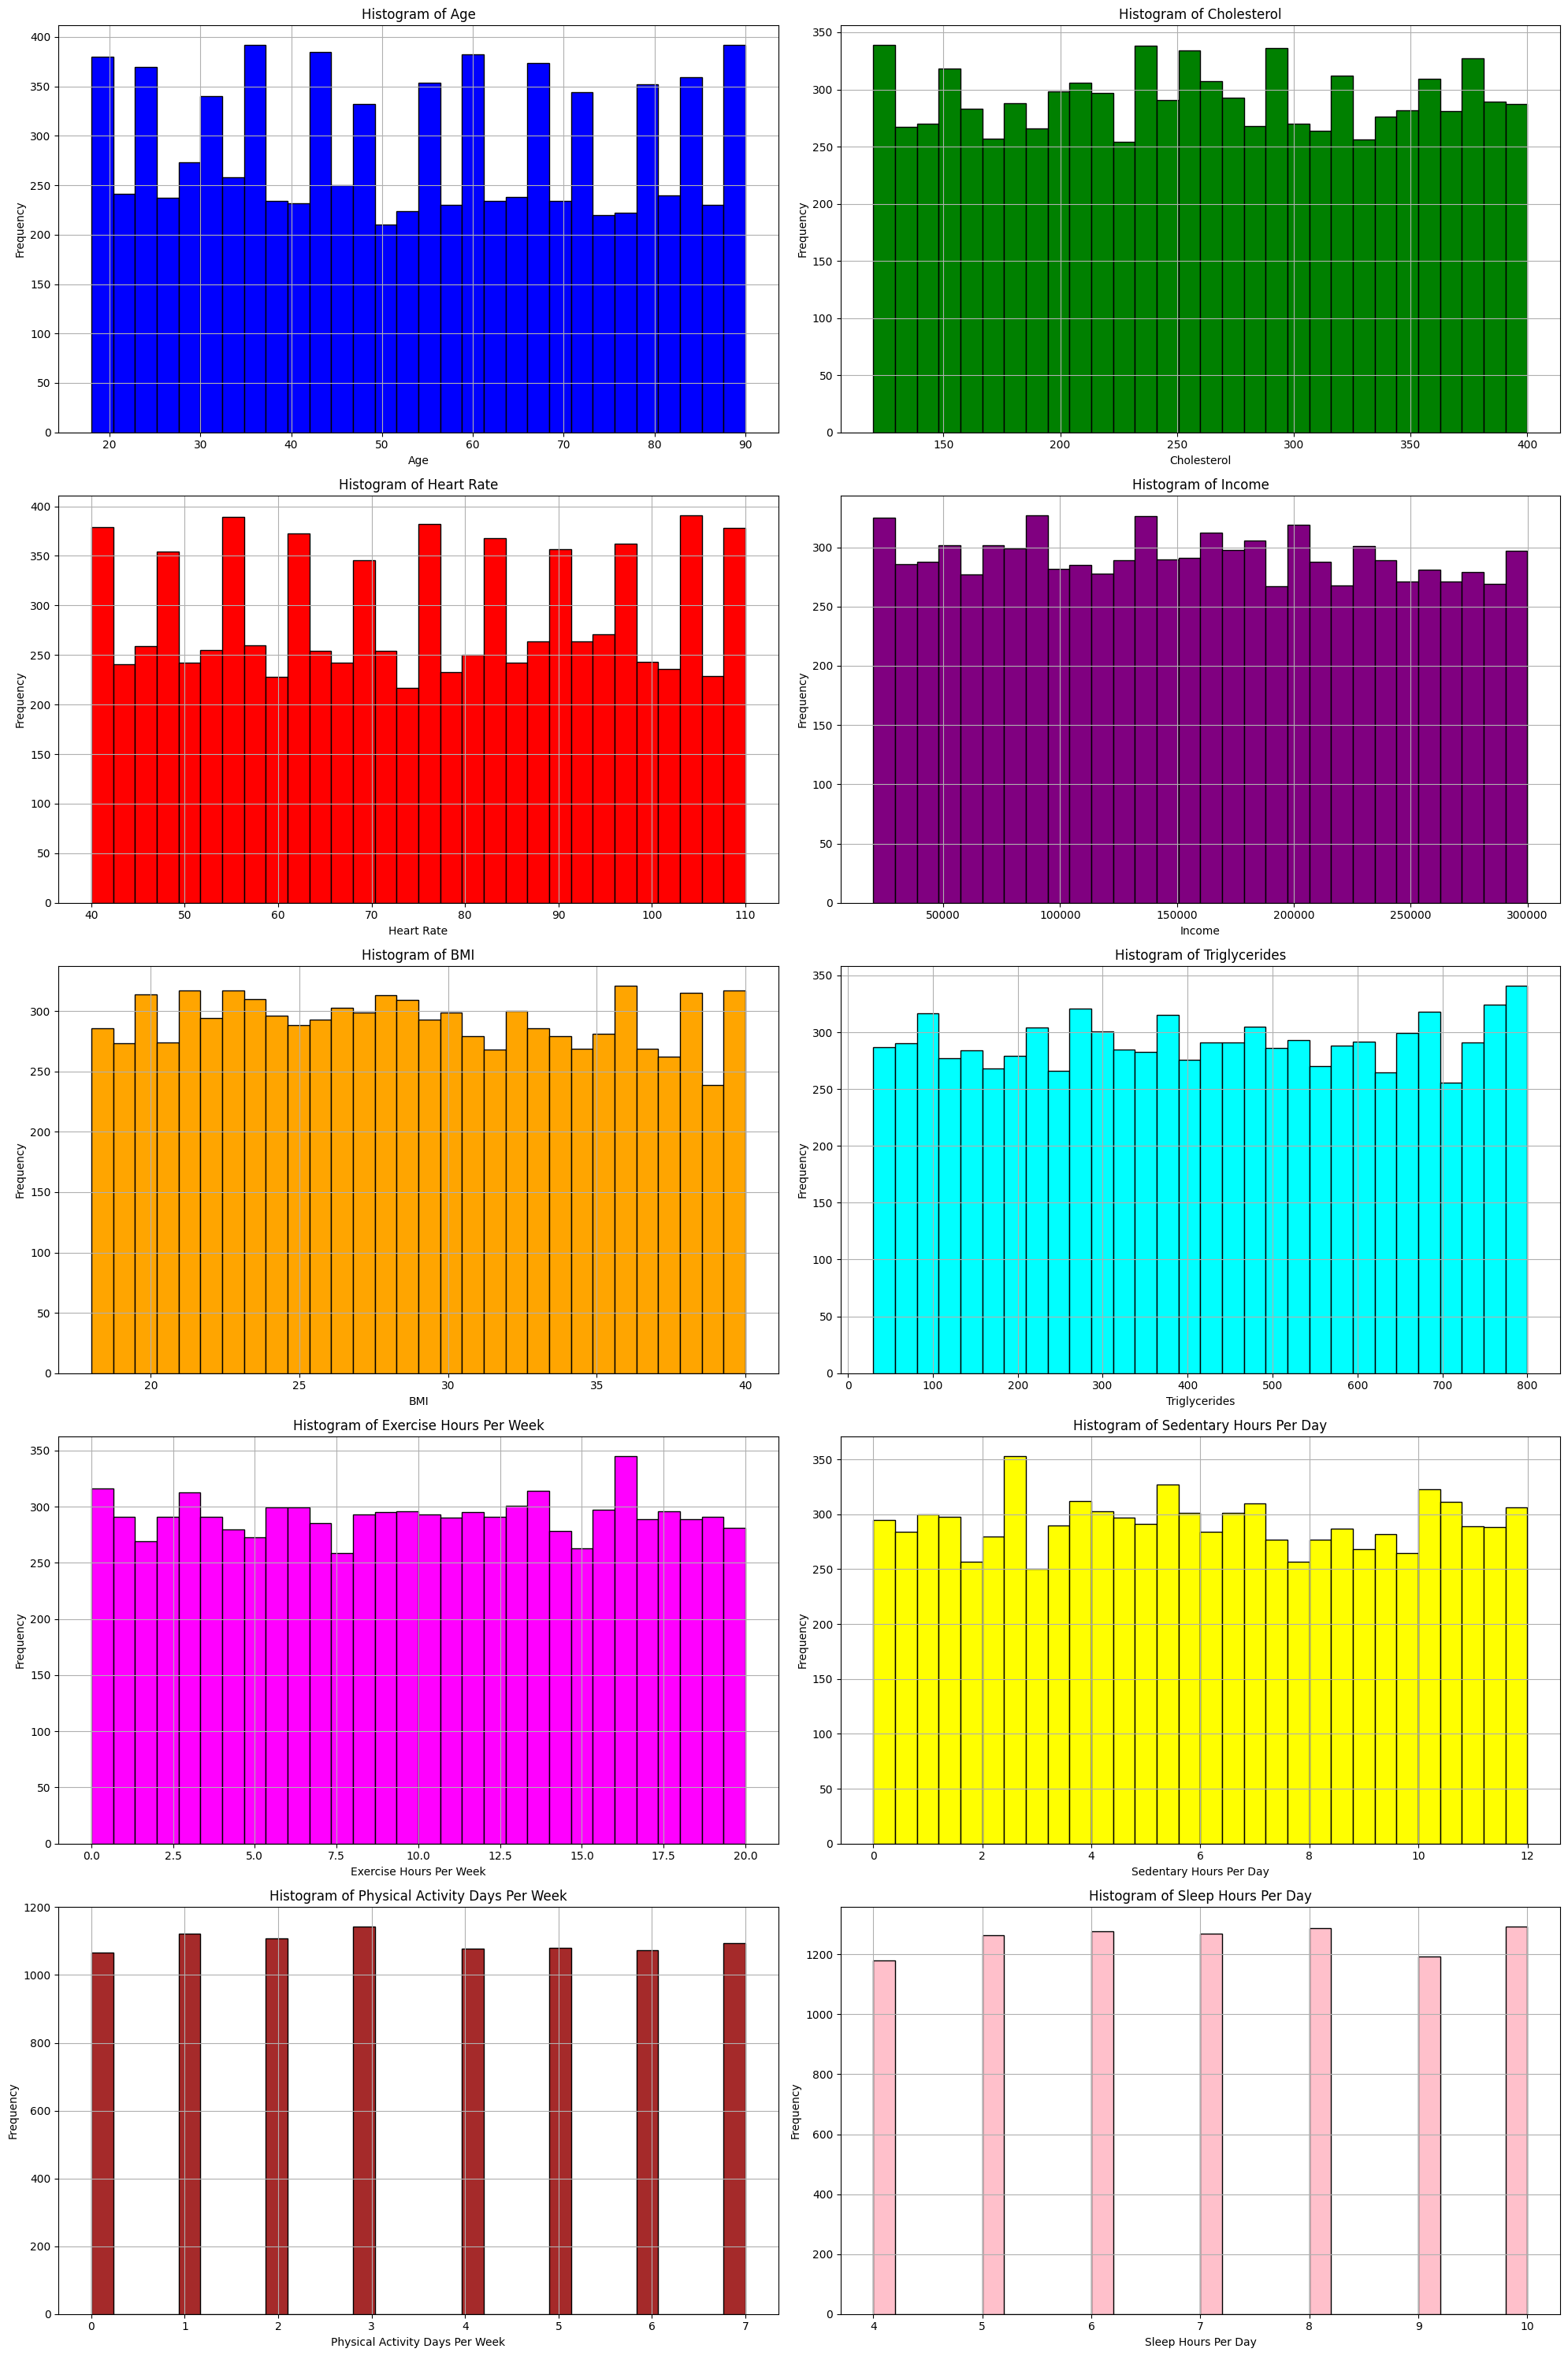

In [60]:
'''-------------------------------------------------------------------------------------
Draw applicable plots to visualise data using the subplot concept on the dataset. (scatter 
plot/ line graph/histogram etc.)
----------------------------------------------------------------------------------------'''

import matplotlib.pyplot as plt
import math

# numerical variables - histogram using subplots
numerical_vars = ['Age', 'Cholesterol', 'Heart Rate', 'Income', 'BMI', 'Triglycerides', 
                  'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Physical Activity Days Per Week', 
                  'Sleep Hours Per Day']

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray']
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

for i, (var, color) in enumerate(zip(numerical_vars, colors)):
    ax = axs[i // 2, i % 2]
    ax.hist(data[var], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.grid(True)   

plt.tight_layout()
plt.show()


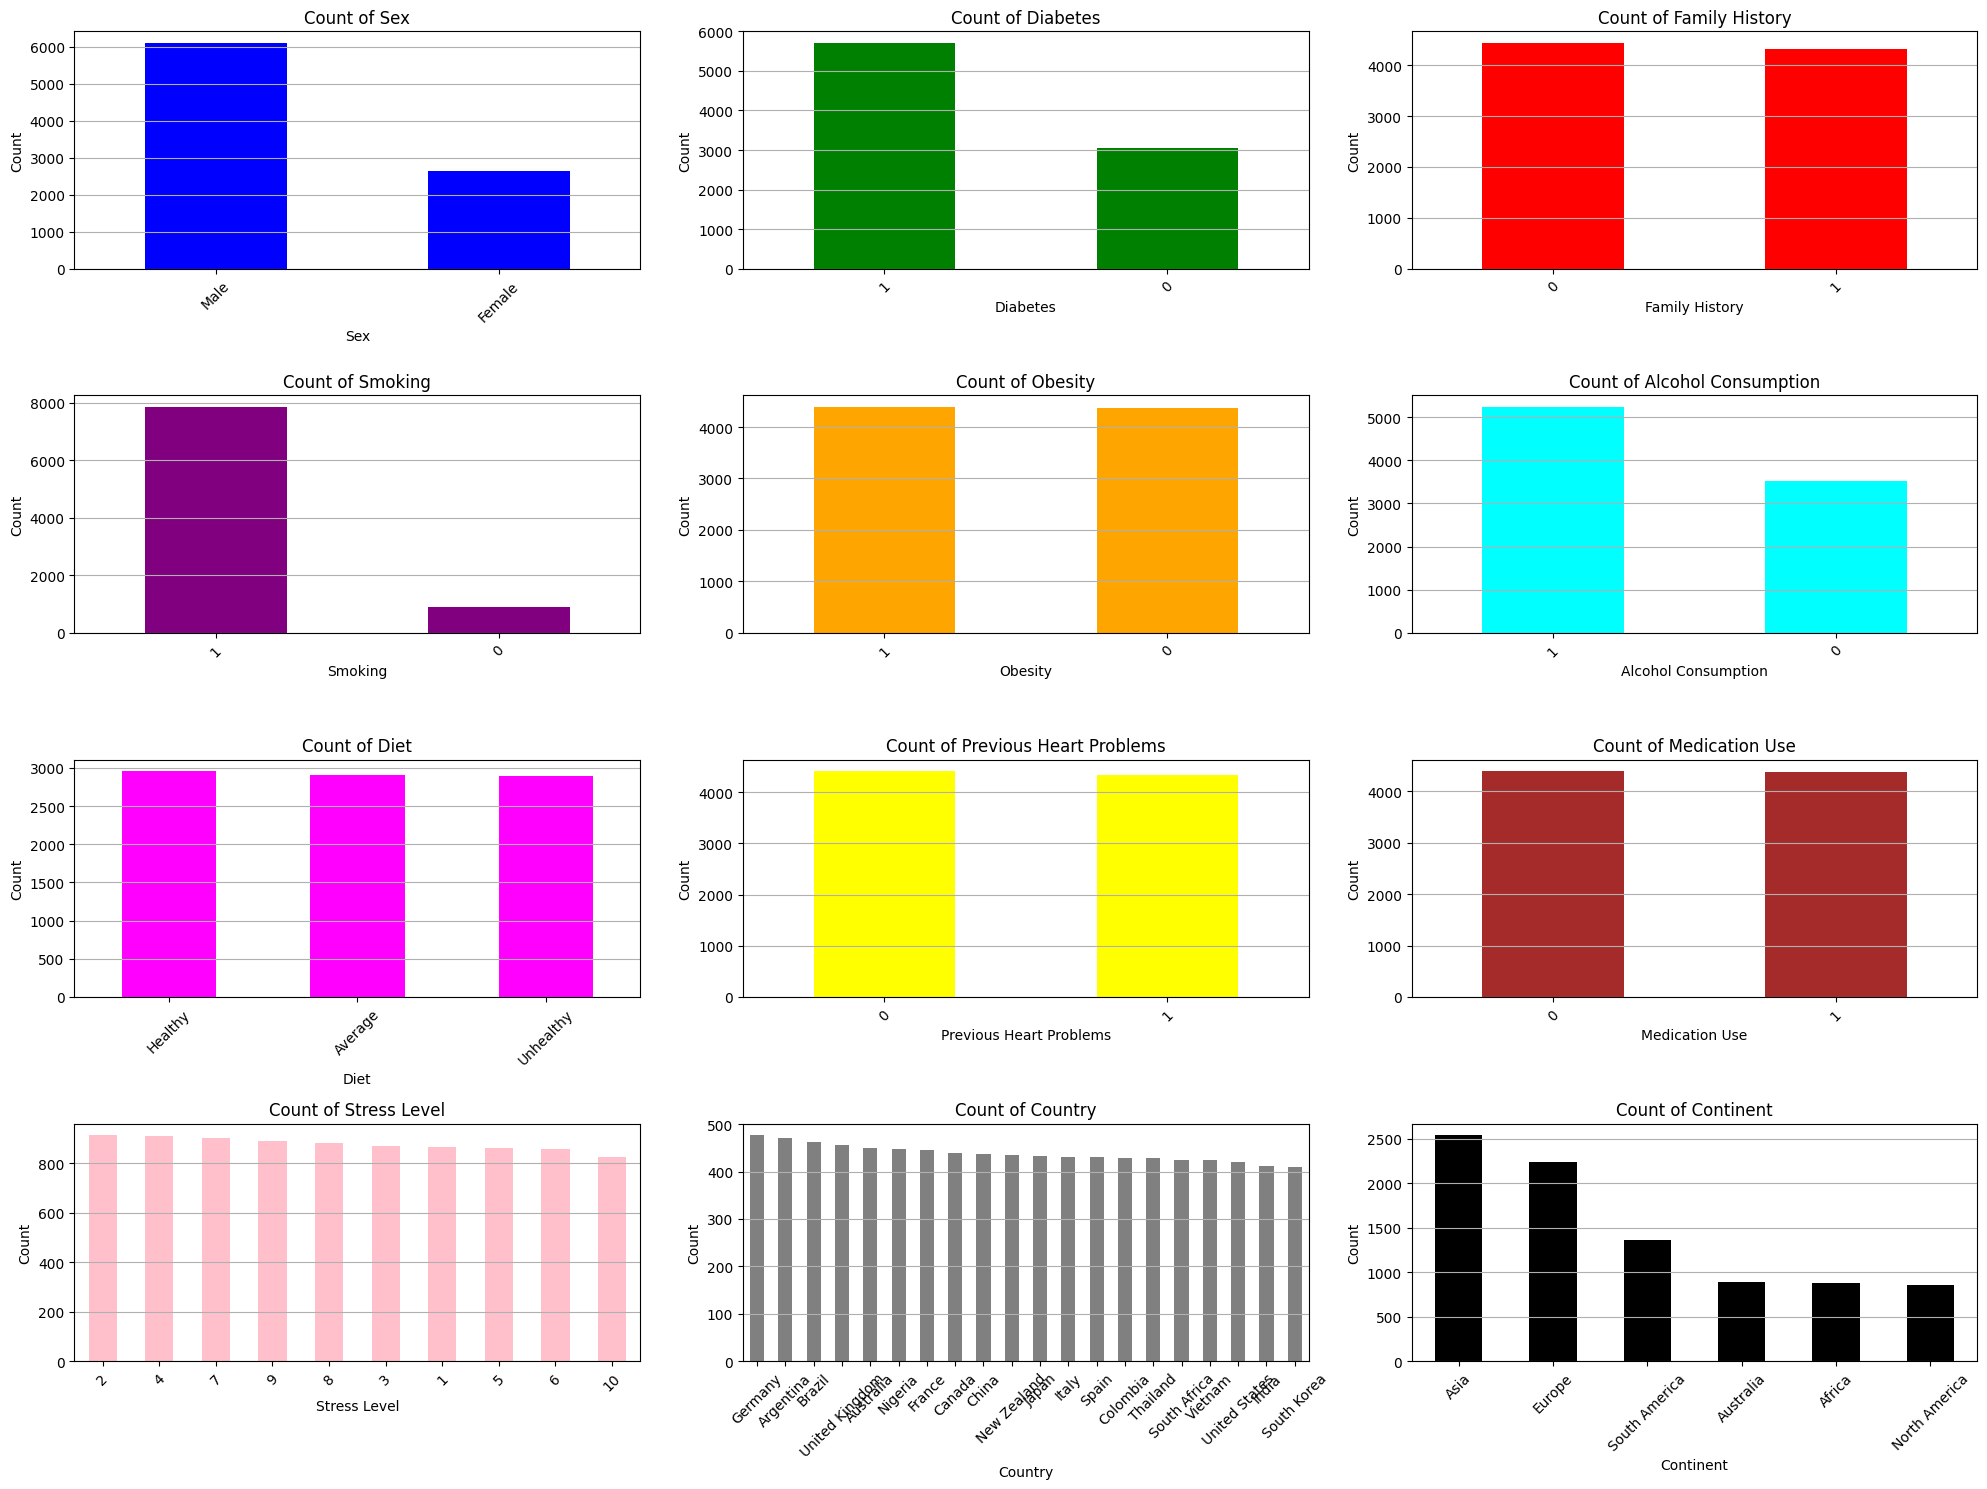

In [61]:
# Categorical Variables - Bar plots using subplots
categorical_vars = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 
                    'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Country', 
                    'Continent']

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray','black']
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, (var, color) in enumerate(zip(categorical_vars, colors)):
    ax = axs[i // 3, i % 3]
    data[var].value_counts().plot(kind='bar', color=color, ax=ax)
    ax.set_title(f'Count of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y')
    
plt.tight_layout()
plt.show()



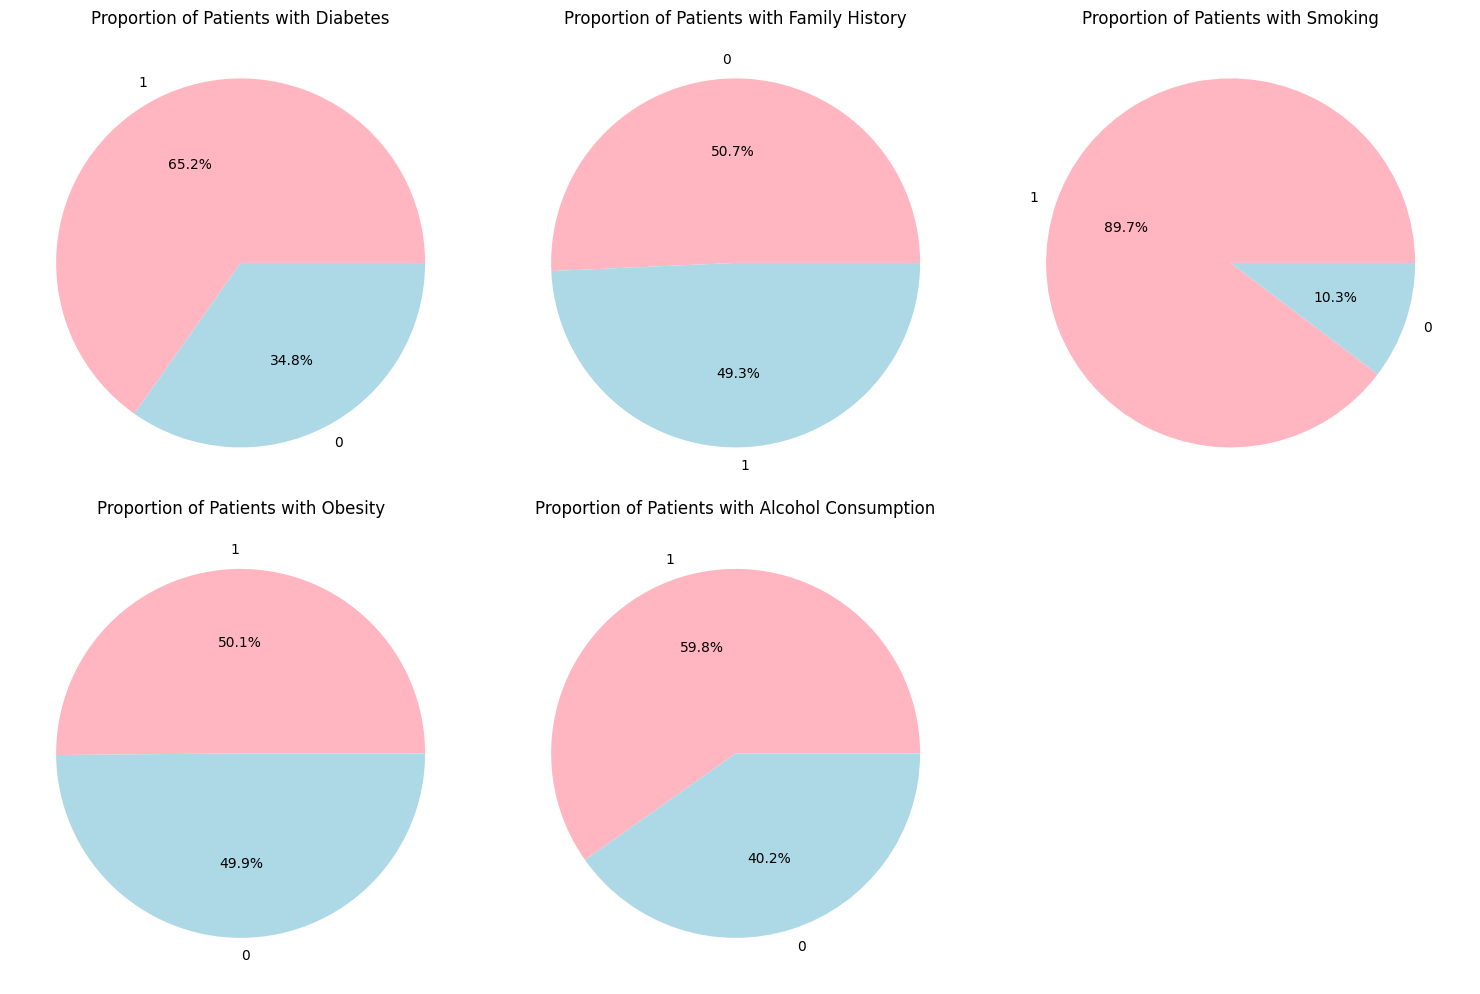

In [62]:
# Categorical variables - pie chart

categorical_columns = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Function to plot pie chart for a column
def plot_pie(column, ax):
    column_counts = data[column].value_counts(normalize=True)
    ax.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
    ax.set_title(f'Proportion of Patients with {column}')

# Plot pie charts
plot_pie('Diabetes', axs[0, 0])
plot_pie('Family History', axs[0, 1])
plot_pie('Smoking', axs[0, 2])
plot_pie('Obesity', axs[1, 0])
plot_pie('Alcohol Consumption', axs[1, 1])

# Hide the empty subplot
axs[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


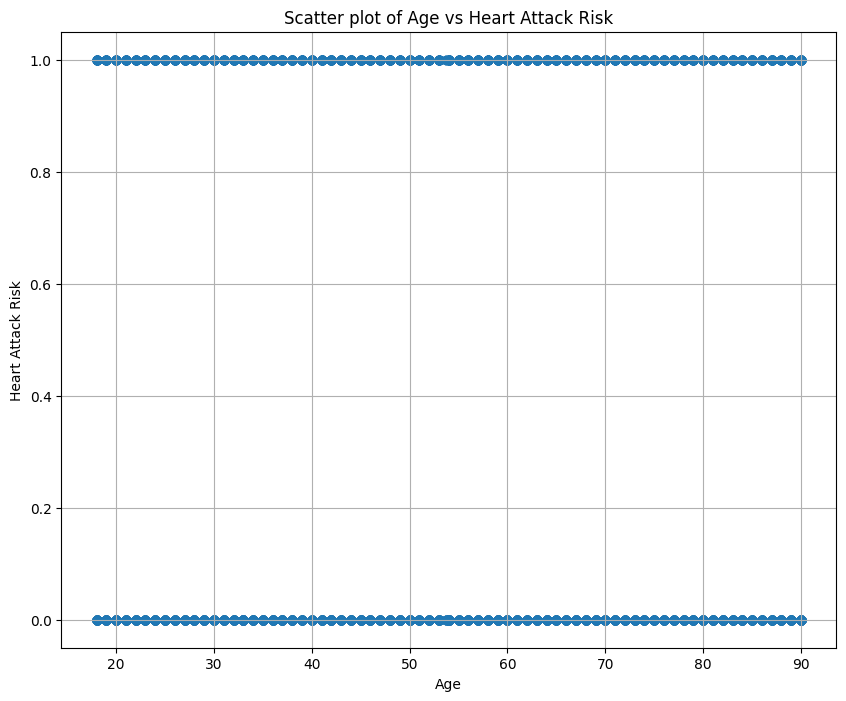

In [63]:
# Scatter plot for Age vs Heart Attack Risk
plt.figure(figsize=(10, 8))
plt.scatter(data['Age'], data['Heart Attack Risk'])
plt.title('Scatter plot of Age vs Heart Attack Risk')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk')
plt.grid(True)

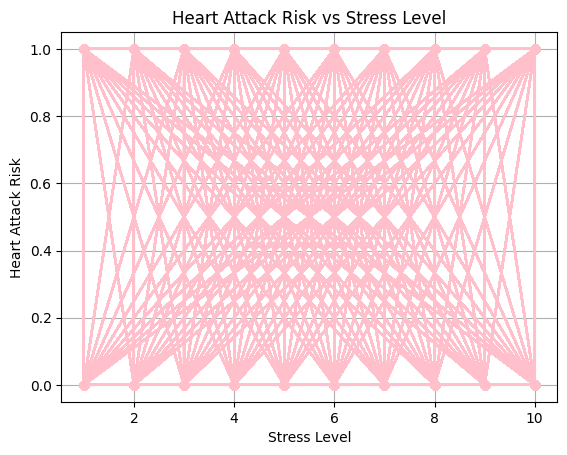

In [64]:
# Scatter plot: Stress level vs. Heart attack risk
plt.plot(data['Stress Level'], data['Heart Attack Risk'], marker='o', linestyle='-', color='pink')
plt.title('Heart Attack Risk vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Heart Attack Risk')
plt.grid(True)
plt.show()



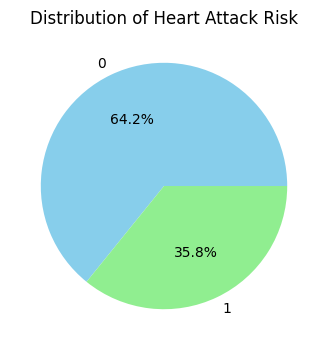

<Figure size 640x480 with 0 Axes>

In [65]:
# Pie chart for Heart Attack Risk distribution
plt.figure(figsize=(5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          , 4))
data['Heart Attack Risk'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Heart Attack Risk')
plt.ylabel('')
plt.show()
plt.tight_layout()
plt.show()

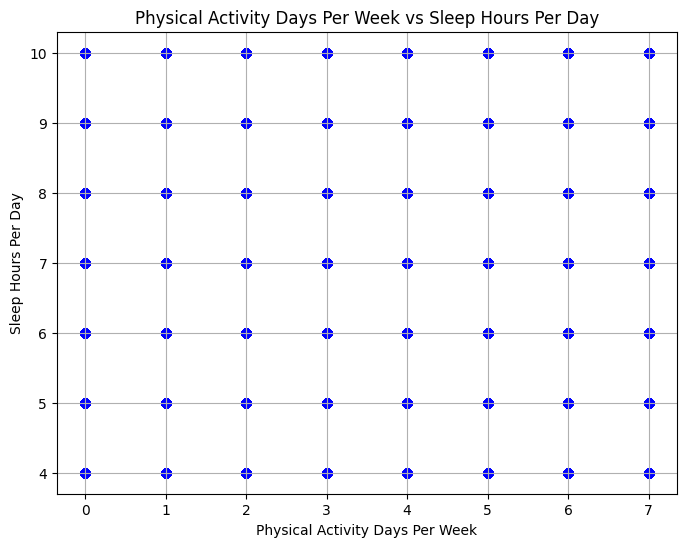

In [66]:
# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter( data['Physical Activity Days Per Week'] ,data['Sleep Hours Per Day'], color='blue')
plt.title('Physical Activity Days Per Week vs Sleep Hours Per Day')
plt.xlabel('Physical Activity Days Per Week')
plt.ylabel('Sleep Hours Per Day')
plt.grid(True)
plt.show()

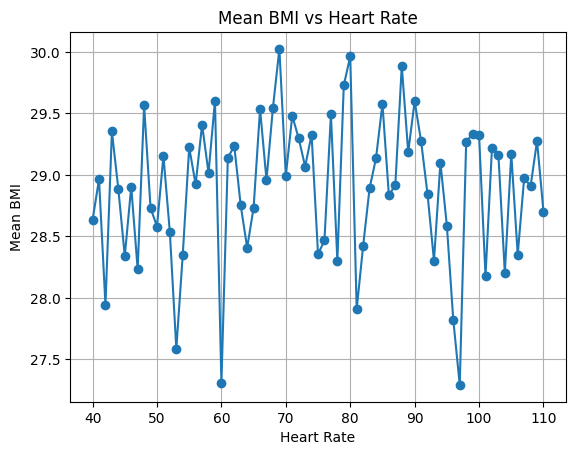

In [67]:
# Grouping by Heart Rate and calculating the mean BMI
meanbmi_by_heartrate = data.groupby('Heart Rate')['BMI'].mean()

# Plotting mean BMI
plt.plot(meanbmi_by_heartrate.index, meanbmi_by_heartrate.values, marker='o')
plt.xlabel('Heart Rate')
plt.ylabel('Mean BMI')
plt.title('Mean BMI vs Heart Rate')
plt.grid(True)
plt.show()


In [68]:
'''-------------------------------------------------------------------------------------
Perform statistical analysis on the selected dataset (count, sum, range, min, max, mean, 
median, mode, variance and Standard deviation).
-------------------------------------------------------------------------------------'''

# first convert all colums in numerical value
from sklearn.preprocessing import LabelEncoder

# Perform label encoding for categorical columns

categorical_cols = ['Patient ID','Age','Sex','Blood Pressure','Diet','Country','Continent','Hemisphere']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])
print(data)

      Patient ID  Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0            521   50    1          208            2510          72         0   
1            998    3    1          389            2815          98         1   
2            529    3    0          324            3224          72         1   
3           3159   67    1          383            2689          73         1   
4           2083   49    1          318            3563          93         1   
...          ...  ...  ...          ...             ...         ...       ...   
8758        4226   43    1          121            3680          61         1   
8759        5502   10    0          120            2434          73         1   
8760        7837   29    1          250            2624         105         0   
8761        1552   18    1          178             838          60         1   
8762        8719    7    0          356            1637          75         1   

      Family History  Smoki

In [69]:
print(data.info())

#statatical analysis 
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   int32  
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int32  
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   int32  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [70]:
#mean
columns = data.columns
means = {}
for col in columns:
    col_data = np.array(data[col])
    mean = np.mean(col_data)
    means[col] = mean
print("Mean for each column:")
for col, mean in means.items():
    print(f"{col}: {mean}")                

Mean for each column:
Patient ID: 4381.0
Age: 36.210316101791626
Sex: 0.6973639164669634
Cholesterol: 259.8772110007988
Blood Pressure: 1945.3355015405682
Heart Rate: 75.02168207234965
Diabetes: 0.6522880292137396
Family History: 0.4929818555289284
Smoking: 0.8968389820837612
Obesity: 0.5014264521282665
Alcohol Consumption: 0.5980828483396097
Exercise Hours Per Week: 10.014283655187722
Diet: 0.9976035604245121
Previous Heart Problems: 0.4958347597854616
Medication Use: 0.49834531553121075
Stress Level: 5.469702156795618
Sedentary Hours Per Day: 5.993690145033664
Income: 158263.18190117538
BMI: 28.89144587727719
Triglycerides: 417.67705123816046
Physical Activity Days Per Week: 3.48967248659135
Sleep Hours Per Day: 7.0235079310738335
Country: 9.382175054205181
Continent: 2.428848567842063
Hemisphere: 0.35398836015063334
Heart Attack Risk: 0.3582106584503024


In [71]:
# Median
medians = {}
for col in columns:
    col_data = np.array(data[col])
    median = np.median(col_data)
    medians[col] = median
print("Median for each column:")
for col, median in medians.items():
    print(f"{col}: {median}")

Median for each column:
Patient ID: 4381.0
Age: 37.0
Sex: 1.0
Cholesterol: 259.0
Blood Pressure: 1940.0
Heart Rate: 75.0
Diabetes: 1.0
Family History: 0.0
Smoking: 1.0
Obesity: 1.0
Alcohol Consumption: 1.0
Exercise Hours Per Week: 10.06955902
Diet: 1.0
Previous Heart Problems: 0.0
Medication Use: 0.0
Stress Level: 5.0
Sedentary Hours Per Day: 5.933622031
Income: 157866.0
BMI: 28.76899935
Triglycerides: 417.0
Physical Activity Days Per Week: 3.0
Sleep Hours Per Day: 7.0
Country: 9.0
Continent: 3.0
Hemisphere: 0.0
Heart Attack Risk: 0.0


In [72]:
#mode
from scipy import stats
modes = {}
for col in columns:
    col_data = np.array(data[col])
    mode = stats.mode(col_data)
    modes[col] = mode
print("Mode for each column:")
for col, mode in modes.items():
    print(f"{col}: {mode}")

Mode for each column:
Patient ID: ModeResult(mode=0, count=1)
Age: ModeResult(mode=73, count=152)
Sex: ModeResult(mode=1, count=6111)
Cholesterol: ModeResult(mode=235, count=52)
Blood Pressure: ModeResult(mode=87, count=8)
Heart Rate: ModeResult(mode=94, count=157)
Diabetes: ModeResult(mode=1, count=5716)
Family History: ModeResult(mode=0, count=4443)
Smoking: ModeResult(mode=1, count=7859)
Obesity: ModeResult(mode=1, count=4394)
Alcohol Consumption: ModeResult(mode=1, count=5241)
Exercise Hours Per Week: ModeResult(mode=0.002442348, count=1)
Diet: ModeResult(mode=1, count=2960)
Previous Heart Problems: ModeResult(mode=0, count=4418)
Medication Use: ModeResult(mode=0, count=4396)
Stress Level: ModeResult(mode=2, count=913)
Sedentary Hours Per Day: ModeResult(mode=0.001263206, count=1)
Income: ModeResult(mode=225278, count=4)
BMI: ModeResult(mode=18.00233658, count=1)
Triglycerides: ModeResult(mode=799, count=25)
Physical Activity Days Per Week: ModeResult(mode=3, count=1143)
Sleep Hour

In [73]:
# Standard Deviation
std_devs = {}
for col in columns:
    col_data = np.array(data[col])
    std_dev = np.std(col_data)
    std_devs[col] = std_dev
print("Standard Deviation for each column:")
for col, std_dev in std_devs.items():
    print(f"{col}: {std_dev}")

Standard Deviation for each column:
Patient ID: 2529.660187983095
Age: 21.674554312015026
Sex: 0.4593990471004718
Cholesterol: 80.85866206944085
Blood Pressure: 1130.3849468192698
Heart Rate: 20.549775300717798
Diabetes: 0.47624400905228736
Family History: 0.4999507432219529
Smoking: 0.30416906860942355
Obesity: 0.4999979652301855
Alcohol Consumption: 0.49028538104005215
Exercise Hours Per Week: 5.783415467980407
Diet: 0.8137631062562594
Previous Heart Problems: 0.49998265047294904
Medication Use: 0.4999972620118122
Stress Level: 2.8594587173818335
Sedentary Hours Per Day: 3.4661613844974095
Income: 80570.59320833185
BMI: 6.318820764864463
Triglycerides: 223.7353697948768
Physical Activity Days Per Week: 2.2825570746523716
Sleep Hours Per Day: 1.9883592926660851
Country: 5.788634065841587
Continent: 1.5974698656640887
Hemisphere: 0.4782056053921773
Heart Attack Risk: 0.47947448589356995


In [74]:

# Variance
variances = {}
for col in columns:
    col_data = np.array(data[col])
    variance = np.var(col_data)
    variances[col] = variance
print("Variance for each column:")
for col, variance in variances.items():
    print(f"{col}: {variance}")

Variance for each column:
Patient ID: 6399180.666666667
Age: 469.7863046244891
Sex: 0.2110474844768215
Cholesterol: 6538.123231660033
Blood Pressure: 1277770.1279956033
Heart Rate: 422.2932649099913
Diabetes: 0.22680835615819517
Family History: 0.24995074564818304
Smoking: 0.0925188222987242
Obesity: 0.24999796523432583
Alcohol Consumption: 0.24037975486158913
Exercise Hours Per Week: 33.447894475275035
Diet: 0.662210393103836
Previous Heart Problems: 0.24998265077395512
Medication Use: 0.24999726201930877
Stress Level: 8.17650415641096
Sedentary Hours Per Day: 12.014274743381
Income: 6491620489.942491
BMI: 39.92749585848232
Triglycerides: 50057.51569725026
Physical Activity Days Per Week: 5.210066799045592
Sleep Hours Per Day: 3.953572676731574
Country: 33.50828434822171
Continent: 2.5519099717048412
Hemisphere: 0.22868060102849883
Heart Attack Risk: 0.2298957826229032


In [75]:
# Range
ranges = {}
for col in columns:
    col_data = np.array(data[col])
    col_range = np.ptp(col_data)  # Using np.ptp to calculate the range
    ranges[col] = col_range
print("Range for each column:")
for col, col_range in ranges.items():
    print(f"{col}: {col_range}")

Range for each column:
Patient ID: 8762
Age: 73
Sex: 1
Cholesterol: 280
Blood Pressure: 3914
Heart Rate: 70
Diabetes: 1
Family History: 1
Smoking: 1
Obesity: 1
Alcohol Consumption: 1
Exercise Hours Per Week: 19.996266702
Diet: 2
Previous Heart Problems: 1
Medication Use: 1
Stress Level: 9
Sedentary Hours Per Day: 11.998050203999998
Income: 279892
BMI: 21.994874239999998
Triglycerides: 770
Physical Activity Days Per Week: 7
Sleep Hours Per Day: 6
Country: 19
Continent: 5
Hemisphere: 1
Heart Attack Risk: 1


In [76]:
# Maximum
max_values = {}
for col in columns:
    col_data = np.array(data[col])
    max_val = np.max(col_data)
    max_values[col] = max_val
print("Maximum value for each column:")
for col, max_val in max_values.items():
    print(f"{col}: {max_val}")

print('')

# Minimum
min_values = {}
for col in columns:
    col_data = np.array(data[col])
    min_val = np.min(col_data)
    min_values[col] = min_val
print("Minimum value for each column:")
for col, min_val in min_values.items():
    print(f"{col}: {min_val}")

Maximum value for each column:
Patient ID: 8762
Age: 73
Sex: 1
Cholesterol: 400
Blood Pressure: 3914
Heart Rate: 110
Diabetes: 1
Family History: 1
Smoking: 1
Obesity: 1
Alcohol Consumption: 1
Exercise Hours Per Week: 19.99870905
Diet: 2
Previous Heart Problems: 1
Medication Use: 1
Stress Level: 10
Sedentary Hours Per Day: 11.99931341
Income: 299954
BMI: 39.99721082
Triglycerides: 800
Physical Activity Days Per Week: 7
Sleep Hours Per Day: 10
Country: 19
Continent: 5
Hemisphere: 1
Heart Attack Risk: 1

Minimum value for each column:
Patient ID: 0
Age: 0
Sex: 0
Cholesterol: 120
Blood Pressure: 0
Heart Rate: 40
Diabetes: 0
Family History: 0
Smoking: 0
Obesity: 0
Alcohol Consumption: 0
Exercise Hours Per Week: 0.002442348
Diet: 0
Previous Heart Problems: 0
Medication Use: 0
Stress Level: 1
Sedentary Hours Per Day: 0.001263206
Income: 20062
BMI: 18.00233658
Triglycerides: 30
Physical Activity Days Per Week: 0
Sleep Hours Per Day: 4
Country: 0
Continent: 0
Hemisphere: 0
Heart Attack Risk: 0


In [77]:
# Count
counts = {}
for col in columns:
    count = data[col].count()
    counts[col] = count
print("Count of non-null values for each column:")
for col, count in counts.items():
    print(f"{col}: {count}")

print('')

# Sum
sums = {}
for col in columns:
    col_data = np.array(data[col])
    col_sum = np.sum(col_data)
    sums[col] = col_sum
print("Sum of values for each column:")
for col, col_sum in sums.items():
    print(f"{col}: {col_sum}")

Count of non-null values for each column:
Patient ID: 8763
Age: 8763
Sex: 8763
Cholesterol: 8763
Blood Pressure: 8763
Heart Rate: 8763
Diabetes: 8763
Family History: 8763
Smoking: 8763
Obesity: 8763
Alcohol Consumption: 8763
Exercise Hours Per Week: 8763
Diet: 8763
Previous Heart Problems: 8763
Medication Use: 8763
Stress Level: 8763
Sedentary Hours Per Day: 8763
Income: 8763
BMI: 8763
Triglycerides: 8763
Physical Activity Days Per Week: 8763
Sleep Hours Per Day: 8763
Country: 8763
Continent: 8763
Hemisphere: 8763
Heart Attack Risk: 8763

Sum of values for each column:
Patient ID: 38390703
Age: 317311
Sex: 6111
Cholesterol: 2277304
Blood Pressure: 17046975
Heart Rate: 657415
Diabetes: 5716
Family History: 4320
Smoking: 7859
Obesity: 4394
Alcohol Consumption: 5241
Exercise Hours Per Week: 87755.16767041001
Diet: 8742
Previous Heart Problems: 4345
Medication Use: 4367
Stress Level: 47931
Sedentary Hours Per Day: 52522.70674093
Income: 1386860263
BMI: 253175.74022258
Triglycerides: 366010

In [78]:
count = data.count()
sum_values = data.sum()
range_values = data.max() - data.min()
min_values = data.min()
max_values = data.max()
mean_values = data.mean()
median_values = data.median()
mode_values = data.mode().iloc[0]
variance_values = data.var()
std_deviation_values = data.std()

# for all the colums 
statistics = pd.DataFrame({
    'Count': count,
    'Sum': sum_values,
    'Range': range_values,
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Variance': variance_values,
    'Standard Deviation': std_deviation_values
})

print(statistics)

                                 Count           Sum          Range  \
Patient ID                        8763  3.839070e+07    8762.000000   
Age                               8763  3.173110e+05      73.000000   
Sex                               8763  6.111000e+03       1.000000   
Cholesterol                       8763  2.277304e+06     280.000000   
Blood Pressure                    8763  1.704698e+07    3914.000000   
Heart Rate                        8763  6.574150e+05      70.000000   
Diabetes                          8763  5.716000e+03       1.000000   
Family History                    8763  4.320000e+03       1.000000   
Smoking                           8763  7.859000e+03       1.000000   
Obesity                           8763  4.394000e+03       1.000000   
Alcohol Consumption               8763  5.241000e+03       1.000000   
Exercise Hours Per Week           8763  8.775517e+04      19.996267   
Diet                              8763  8.742000e+03       2.000000   
Previo

In [79]:
'''-------------------------------------------------------------------------------------
Train the model of the K-nearest Neighbors Classifier/Regressor with 80% of the data and 
predict the class label for the rest 20% of the data. Evaluate the model with all 
appropriate measures.
----------------------------------------------------------------------------------------'''

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score ,precision_score


x = data.iloc[:, :-1]  # Selecting all columns except the last one as features
y = data.iloc[:, -1]   # Selecting the last column as the target variable

nrows = data.shape[0]
print("Total Rows:", nrows)

test_split = float(input("Enter a number between 0 and 1 to specify the test split: "))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split)
print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

k = int(input("Enter the K neighbors: "))
model = KNeighborsClassifier(n_neighbors=k, weights="distance")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print(y_predict)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_predict, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_predict, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_predict, average='weighted')
print("F1 Score:", f1)

report = classification_report(y_test, y_predict)
print("Classification Report:\n", report)   

Total Rows: 8763
Shapes: (7010, 25) (7010,) (1753, 25) (1753,)
[0 0 0 ... 0 1 1]
Accuracy: 0.5887050770108385
Precision: 0.5355605910590344
Recall: 0.5887050770108385
F1 Score: 0.5471024966866681
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      1140
           1       0.33      0.17      0.23       613

    accuracy                           0.59      1753
   macro avg       0.49      0.49      0.47      1753
weighted avg       0.54      0.59      0.55      1753



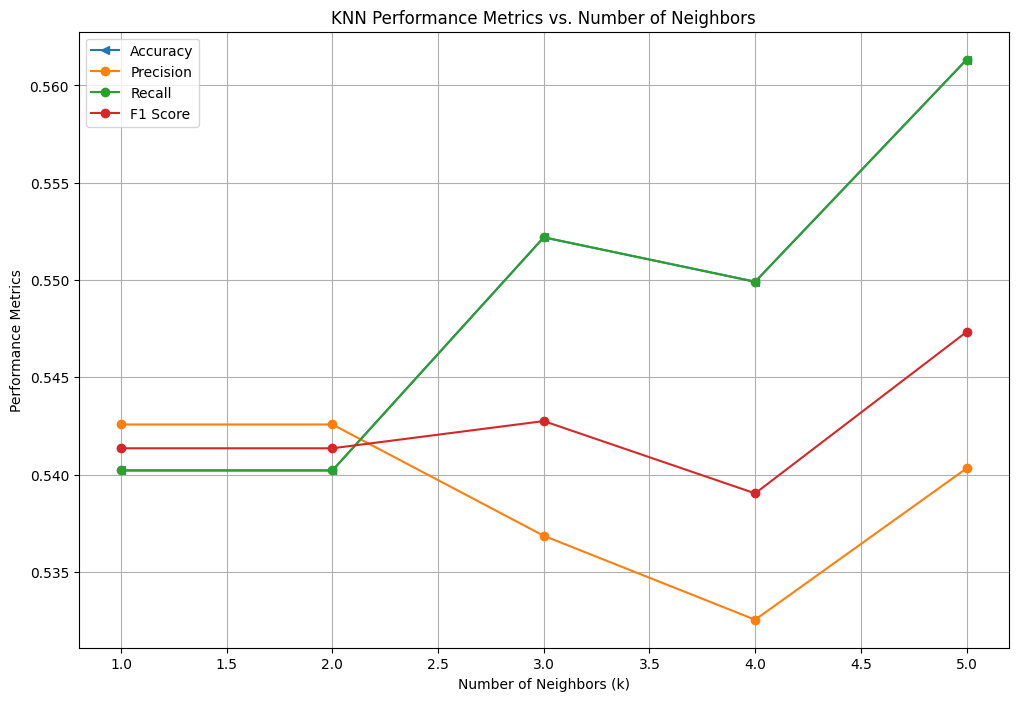

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x = data.iloc[:, :-1]  # Selecting all columns except the last one as features
y = data.iloc[:, -1]   # Selecting the last column as the target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

k_values = [1, 2, 3, 4, 5]
accuracy_values = []
precision_values = []
recall_values = []        
f1_values = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    
    accuracy_values.append(accuracy_score(y_test, y_predict))
    precision_values.append(precision_score(y_test, y_predict, average='weighted'))
    recall_values.append(recall_score(y_test, y_predict, average='weighted'))
    f1_values.append(f1_score(y_test, y_predict, average='weighted'))


plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_values, label='Accuracy', marker='o')
plt.plot(k_values, precision_values, label='Precision', marker='o')
plt.plot(k_values, recall_values, label='Recall', marker='o')
plt.plot(k_values, f1_values, label='F1 Score', marker='o')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Performance Metrics')
plt.title('KNN Performance Metrics vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
'''---------------------------------------------------------------------------------------
Conclude your observation concerning achieved results.
----------------------------------------------------------------------------------------'''

print("""
Report: Analysis of Heart Attack Prediction Dataset

1. Introduction:
The following report presents an analysis of the Heart Attack Prediction dataset, aiming to predict heart attack risk based on various attributes. The dataset contains information on demographic factors, medical history, lifestyle habits, and physiological parameters.

2. Data Domain and Characteristics:

Data Domain: The dataset's domain revolves around predicting heart attack risk.
Data Characteristics:
The dataset consists of several features such as age, cholesterol levels, heart rate, lifestyle factors, and more.
Initial exploration reveals the presence of missing values, which were addressed through preprocessing techniques.
Key insights were derived from identifying null values, not null values, and unique values in each column.

3. Preprocessing and Cleaning:

Null records were dropped from the dataset to ensure data integrity.
Missing values in numerical columns were replaced with the mean value, while categorical columns were imputed with the mode value.

4. Statistical Analysis:

Statistical measures such as count, sum, range, min, max, mean, median, mode, variance, and standard deviation were computed for each column.
These analyses provided a deeper understanding of the dataset's distribution and variability.

5. Visualization:

Visualizations, including histograms, bar plots, pie charts, and scatter plots, were utilized to explore data distributions and relationships between variables.
Insights gained from visualizations helped in identifying patterns and trends within the dataset.

6. Model Training and Evaluation:

A K-nearest Neighbors Classifier was trained using 80% of the dataset, with the remaining 20% used for evaluation.
The model's performance was assessed using accuracy score and classification reports.

7. Observations and Conclusion:

The dataset offers valuable insights into factors influencing heart attack risk, encompassing demographic, medical, and lifestyle aspects.
Preprocessing steps were crucial for enhancing data quality and reliability.
The K-nearest Neighbors Classifier demonstrated moderate predictive performance, suggesting potential utility in heart disease risk assessment.

In conclusion, the analysis of the Heart Attack Prediction dataset provides valuable insights into understanding and predicting heart attack risk, offering potential avenues for improving cardiovascular health outcomes.
""")


Report: Analysis of Heart Attack Prediction Dataset

1. Introduction:
The following report presents an analysis of the Heart Attack Prediction dataset, aiming to predict heart attack risk based on various attributes. The dataset contains information on demographic factors, medical history, lifestyle habits, and physiological parameters.

2. Data Domain and Characteristics:

Data Domain: The dataset's domain revolves around predicting heart attack risk.
Data Characteristics:
The dataset consists of several features such as age, cholesterol levels, heart rate, lifestyle factors, and more.
Initial exploration reveals the presence of missing values, which were addressed through preprocessing techniques.
Key insights were derived from identifying null values, not null values, and unique values in each column.

3. Preprocessing and Cleaning:

Null records were dropped from the dataset to ensure data integrity.
Missing values in numerical columns were replaced with the mean value, while cate